In [1]:
from torch_snippets import *
from nltk import flatten
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Loading the data and removing rows where VIN number is null. Becuase we won't know the histroy of the vehicle without it.

In [2]:
files = Glob("*.xlsx")

df = []
for file in files:
    sdf = pd.read_excel(file)
    sdf = sdf.dropna(subset=['VIN'])
    df.append(sdf)

## Data Exploration and Data Pre-processing

In [3]:
car_df = pd.concat(df)
#car_df = car_df[important_columns] # Choosing only important columns
car_df.rename(columns={"MULES": 'MILES'}, inplace=True)
car_df.reset_index(drop=True, inplace=True)

In [4]:
# car_df = pd.read_csv("sample_data.csv")

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664250 entries, 0 to 1664249
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ODINO              1664250 non-null  int64  
 1   MFR_NAME           1664247 non-null  object 
 2   MAKETEXT           1664247 non-null  object 
 3   MODELTEXT          1664245 non-null  object 
 4   YEARTXT            1664247 non-null  float64
 5   CRASH              1664250 non-null  object 
 6   FAILDATE           1595564 non-null  float64
 7   FIRE               1664250 non-null  object 
 8   INJURED            1664250 non-null  int64  
 9   DEATHS             1664250 non-null  int64  
 10  COMPDESC           1664159 non-null  object 
 11  CITY               1664209 non-null  object 
 12  STATE              1664247 non-null  object 
 13  VIN                1664250 non-null  object 
 14  DATEA              1664249 non-null  float64
 15  LDATE              1664249 non-n

In [6]:
car_df.describe()

,ODINO,YEARTXT,FAILDATE,INJURED,DEATHS,DATEA,LDATE,MILES,OCCURENCES,PURCH_DT,NUMB_CYLS
count,1.664250e+06,1.664247e+06,1.595564e+06,1.664250e+06,1.664250e+06,1.664249e+06,1.664249e+06,9.639510e+05,752293.000000,3.336640e+05,430469.000000
mean,9.157906e+06,2.019543e+03,2.012140e+07,5.721196e-02,3.007962e-03,2.012281e+07,2.012267e+07,7.125108e+04,10.992414,2.001634e+07,5.824289
std,4.122399e+06,3.205082e+02,1.157868e+05,4.422835e-01,2.458354e-01,8.069882e+04,8.093159e+04,1.142014e+05,253.782196,2.013903e+05,1.583062
min,0.000000e+00,1.949000e+03,3.102000e+04,0.000000e+00,0.000000e+00,1.995010e+07,1.995010e+07,-9.500000e+04,-2.000000,2.110700e+04,0.000000
25%,1.013943e+07,2.001000e+03,2.006093e+07,0.000000e+00,0.000000e+00,2.005101e+07,2.005101e+07,2.700000e+04,1.000000,1.997110e+07,4.000000
50%,1.062745e+07,2.007000e+03,2.014070e+07,0.000000e+00,0.000000e+00,2.014082e+07,2.014082e+07,6.137700e+04,1.000000,2.000090e+07,6.000000
75%,1.120813e+07,2.013000e+03,2.019033e+07,0.000000e+00,0.000000e+00,2.019052e+07,2.019052e+07,1.000000e+05,1.000000,2.003122e+07,6.000000
max,1.000000e+09,9.999000e+03,2.203073e+07,9.900000e+01,9.900000e+01,2.024052e+07,2.024052e+07,9.999999e+06,9999.000000,9.199032e+07,96.000000


Checking for null and non null values under each feature.

In [7]:
null_counts = car_df.isnull().sum() # Summing all the null values 
non_null_counts = car_df.notnull().sum() # Summing all the non-null values
combined_counts = pd.concat([non_null_counts, null_counts], axis=1)
combined_counts.columns = ['Non-Null Count', 'Null Count'] 
combined_counts # Displaying the null and non null values for each feature.

,Non-Null Count,Null Count
ODINO,1664250,0
MFR_NAME,1664247,3
MAKETEXT,1664247,3
MODELTEXT,1664245,5
YEARTXT,1664247,3
CRASH,1664250,0
FAILDATE,1595564,68686
FIRE,1664250,0
INJURED,1664250,0
DEATHS,1664250,0


Visualising Missing Values

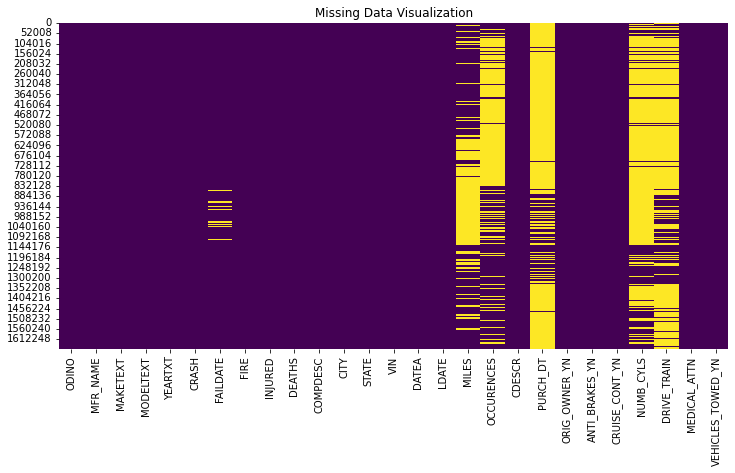

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(car_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

Since there are too many null rows under FAILDATE we won't be able to use it.

There only one null row under DATEA, we can remove it and use it for getting the age of the vehicle when the car has been brought to servicing or unexpected servicing

We will also remove null valued rows in COMPDESC as we won't be able to collect any information from them.

We will also remove MILES and Purchase date as there are too many empty values.

In [9]:
car_df = car_df.dropna(subset=['DATEA'])
car_df = car_df.dropna(subset=['COMPDESC'])
# car_df.drop(columns=['MILES', 'PURCH_DT'], inplace=True)

The FAILDATE, DATEA, LDATE and YEARTXT are in float format, lets convert them to date format

In [10]:
date_columns = ['FAILDATE', 'DATEA', 'LDATE']
for col in date_columns:
    if col in car_df.columns:
        car_df[col] = pd.to_datetime(car_df[col], format='%Y%m%d', errors='coerce') # Converting required columns to "%Y%m%d" format

if 'YEARTXT' in car_df.columns:
    car_df['YEARTXT'] = pd.to_datetime(car_df['YEARTXT'], format='%Y', errors='coerce') # Converting YEARTXT column to "%Y%m%d" format

In [11]:
car_df = car_df.sort_values('DATEA', ascending=True)

The COMPDESC information is of the following format "FUEL SYSTEM, GASOLINE:DELIVERY", We will convert them to list to categorise them as our requirement.

In [12]:
car_df['COMPDESC'] = car_df['COMPDESC'].fillna('')
car_df['COMPDESC'] = car_df['COMPDESC'].str.split(':').apply(lambda x: [item.strip() for item in x]) # Splitting the COMPDESC values by ":" and stripping the spaces.

I have also observed that a same VIN number has multiple records with same DATEA, You can find the example in the below cell. we will groupby the data with respect to VIN number and DATEA to get more accurate information

In [13]:
car_df[car_df['VIN'] == "2HGFC2F86LH"].head()

,ODINO,MFR_NAME,MAKETEXT,MODELTEXT,YEARTXT,CRASH,FAILDATE,FIRE,INJURED,DEATHS,COMPDESC,CITY,STATE,VIN,DATEA,LDATE,MILES,OCCURENCES,CDESCR,PURCH_DT,ORIG_OWNER_YN,ANTI_BRAKES_YN,CRUISE_CONT_YN,NUMB_CYLS,DRIVE_TRAIN,MEDICAL_ATTN,VEHICLES_TOWED_YN
816787,11579385,Honda (American Honda Motor Co.),HONDA,CIVIC,2020-01-01,N,2024-03-25,N,0,0,[ENGINE],Des Moines,IA,2HGFC2F86LH,2024-03-25,2024-03-25,NaN,NaN,Car loses power when driving at highway speeds...,NaN,N,N,N,NaN,NaN,N,N
816788,11579385,Honda (American Honda Motor Co.),HONDA,CIVIC,2020-01-01,N,2024-03-25,N,0,0,[FUEL/PROPULSION SYSTEM],Des Moines,IA,2HGFC2F86LH,2024-03-25,2024-03-25,NaN,NaN,Car loses power when driving at highway speeds...,NaN,N,N,N,NaN,NaN,N,N
821755,11582924,Honda (American Honda Motor Co.),HONDA,CIVIC,2020-01-01,N,2024-04-14,N,0,0,[FUEL/PROPULSION SYSTEM],Des Moines,IA,2HGFC2F86LH,2024-04-14,2024-04-14,NaN,NaN,Again while driving at highway speeds the vehi...,NaN,N,N,N,NaN,NaN,N,N
821756,11582924,Honda (American Honda Motor Co.),HONDA,CIVIC,2020-01-01,N,2024-04-14,N,0,0,[UNKNOWN OR OTHER],Des Moines,IA,2HGFC2F86LH,2024-04-14,2024-04-14,NaN,NaN,Again while driving at highway speeds the vehi...,NaN,N,N,N,NaN,NaN,N,N
823740,11584341,Honda (American Honda Motor Co.),HONDA,CIVIC,2020-01-01,N,2024-04-21,N,0,0,[FUEL/PROPULSION SYSTEM],Des Moines,IA,2HGFC2F86LH,2024-04-21,2024-04-21,NaN,NaN,Once again the car loses ability to accelerate...,NaN,N,N,N,NaN,NaN,N,N


In [14]:
def concat_strings(series):
    return 

car_df = car_df.groupby(['VIN', 'FAILDATE']).agg({
    'COMPDESC': lambda x: sum(x, []), # For concatinating the lists persent in COMPDESC while performing group by
    'CDESCR': lambda x: list(x), # For creating lists for description provided while performing group by
    **{col: 'first' for col in car_df.columns if col not in ['VIN', 'FAILDATE', 'COMPDESC', 'CDESCR']}
}).reset_index()

# vin_counts = car_df['VIN'].value_counts()
# car_df = car_df[car_df['VIN'].isin(vin_counts[vin_counts >= 3].index)]

We will calculate the age of the vehicles using YEARTXT [Manufacturing Date] and DATEA [The Problem Date] and not with FAILDATE as there are missing values in it.

In [15]:
car_df['AGE'] = (car_df['DATEA'].dt.year - car_df['YEARTXT'].dt.year) * 12 + (car_df['DATEA'].dt.month - car_df['YEARTXT'].dt.month)

# There are full null values in the age column we will remove them. 
car_df = car_df.dropna(subset=['AGE'])

We will now create occurances count for all the Cars based on VIN number and DATEA

In [16]:
# Sort the data by 'VIN' and 'DATEA' to make sure the dates are in order
car_df = car_df.sort_values(by=['VIN', 'DATEA'])

# Now, we fill the 'OCCURENCES' column based on the sorted order within each 'VIN' group
car_df['OCCURENCES'] = car_df.groupby('VIN').cumcount()

We caluclate the time since last repair

In [17]:
car_df = car_df.sort_values(by=['VIN', 'DATEA'])

# We calculate the time difference between each repair event for each VIN
car_df['Time Since Last Repair'] = car_df.groupby('VIN')['DATEA'].diff()
car_df['Time Since Last Repair'] = car_df['Time Since Last Repair'].dt.days

# we convert days to months, where any days less than a month are shown as a decimal
car_df['Time Since Last Repair'] = round(car_df['Time Since Last Repair'] / 30.0, 2)


# We fill missing values for 'Time Since Last Repair' with the mean of the column
mean_time_since_last_repair = car_df['Time Since Last Repair'].mean()
car_df['Time Since Last Repair'].fillna(mean_time_since_last_repair, inplace=True)

Replace the Nan values wit 'N' as they have the majority compared to 'Y'. And also convert them to true or false

In [18]:
binary_columns = ['CRASH', 'FIRE', 'ORIG_OWNER_YN', 'MEDICAL_ATTN', 'VEHICLES_TOWED_YN', 'ANTI_BRAKES_YN', 'CRUISE_CONT_YN']
for column in binary_columns:
    car_df[column] = car_df[column].fillna('N')
    
for column in binary_columns:
    car_df[column] = car_df[column].replace({'Y': True, 'N': False})

Convert all the Manufactures to "Others" if their value_counts is less than 200. If less than 200 the cardinality will be high.

In [19]:
maketext_counts = car_df['MAKETEXT'].value_counts()

# Find MAKETEXTs with counts less than 200
maketext_less_than_200 = maketext_counts[maketext_counts < 200].index

# Replace MAKETEXT names with "Other" for those that have counts less than 200
car_df['MAKETEXT'] = car_df['MAKETEXT'].apply(lambda x: "OTHERS" if x in maketext_less_than_200 else x)

Convert all the engine component used in repair to what type of problem it is.

In [20]:
vehicle_repair_categories = {
    "Battery Replacement": ["12V/24V/48V BATTERY"],
    "Warning": ["WARNING", "WARNING LIGHT/DEVICES", "WARNINGS", "ABS WARNING LIGHT", "BRAKE FLUID LOW WARNING", "LOW PRESSURE WARNING", 
                "SMOKE/CO WARNING/ALARM", "SRS MALFUNCTION WARNING LAMP/LIGHT", "ALARM", "BACK UP ALARM", "BACK UP ALARM", "AUTO CRASH NOTIFICATION", 
                "HAZARD FLASHING WARNING LIGHTS"],
    "Air Bag System": ["AIR BAG/RESTRAINT CONTROL MODULE", "AIR BAGS", "AIR BAG INFLATOR MODULE", "ALLEGED COUNTERFEIT AIR BAG"],
    "Audio and Video": ["AUX AUDIO JACK/PLUG", "BLUETOOTH/WIFI", "RADIO/TAPE DECK/CD ETC.", "TV/RADIO/SPEAKERS", "VIDEO (TOUCH)SCREEN/MONITOR/UNIT", "VIDEO MONITOR/SCREEN"],
    "Body Repair": ["BUMPER", "BUMPERS", "DOOR", "DOORS", "FENDER", "FENDERS", "FIXED PANARAMIC ROOF/SKY LIGHT ASSEMBLY", "FLOOR", "FLOOR MATS", "FRONTAL", "HATCHBACK/LIFTGATE", 
             "HOOD", "HORN", "HUBCAP/COVER","INTERIOR", "INTERIOR PANELS", "INTERIOR/UNDER DASH", "LIFTGATE", "MOONROOF", "REAR WINDOW", "ROOF AND PILLARS", 
             "RUNNING BOARDS", "SIDE SKIRT", "SPOILER", "SUN VISOR", "SUN/MOON ROOF ASSEMBLY", "TAILGATE", "TRUNK LID", "UNDERBODY SHIELDS", "WHEEL WELL LINER", 
             "WINDSHIELD", "REAR COMPARTMENT/TRUNK", "HINGE AND ATTACHMENTS", "GLASS, SIDE/REAR", "REARVIEW MIRRORS/DEVICES", "FRAME AND MEMBERS", "FRONT UNDERHOOD", 
             "SHIELD ASSEMBLY", "FLOORING"],
    "Driver Assistance": ["ADAPTIVE CRUISE CONTROL", "AUTOMATIC EMERGENCY BRAKING", "Blind Spot Detection", "Collision Avoidance System", "Driver Monitoring System", 
                          "ELECTRONIC STABILITY CONTROL", "HILL DESCENT ASSIST", "HILL START ASSIST", "LANE DEPARTURE", "LANE KEEP", "PARKING ASSIST", 
                          "REARVIEW SYSTEM BRAKING", "TRACTION CONTROL SYSTEM", "AUTOMATIC EMERGENCY STEERING", "AUTOMATIC STEERING", "AUTOMATIC SYSTEM BRAKING", 
                          "AUTONOMOUS/SELF DRIVING", "AUTOMATED/ADAPTIVE STEERING", "ADAS", "FORWARD COLLISION AVOIDANCE", "ANTILOCK/TRACTION CONTROL/ELECTRONIC LIMITED SLIP",
                          "ANTILOCK", "AUTOMATIC (ASC)", "LIDAR", "STEERING ASSIST", "SIGNAGE/SIGNAL RECOGNITION", "RADAR", "PEDESTRIAN/CYCLIST/OBJECT/OBSTACLE/ RECOGNITION", 
                          "BACK OVER PREVENTION", "NAVIGATIONAL SYSTEM(GLOBAL POSITIONING SYSTEM)"],
    "Engine Diagnostics/Repair/Replacement": ["ENGINE", "ENGINE AND ENGINE COOLING", "ENGINE BLOCK HEATER", "ENGINE CONTROL MODULE (ECU/ECM)", "TURBO/SUPERCHARGER",
                                              "ENGINE COOLANT HOSES AND FITTINGS", "ENGINE MOUNT REPLACEMENT", "CRANK/CAMSHAFT POSITION SENSOR", 
                                              "MANIFOLD/HEADER/MUFFLER/TAIL PIPE", "FUEL PUMP", "FUEL RAIL", "IGNITION", "OIL COOLER", 
                                              "FUEL SYSTEM, DIESEL", "FUEL SYSTEM, GASOLINE", "CARBURETOR SYSTEM", "CYLINDER", "PISTON", "CONNECTING ROD", 
                                              "CRANKSHAFT", "TIMING BELT", "TIMING CHAIN", "CAMSHAFT", "OIL PAN", "OIL PUMP", "GASKETS", "SEALS", "IDLER AND ATTACHMENT", 
                                              "BELTS AND ASSOCIATED PULLEYS", "FUEL/PROPULSION SYSTEM", "SEALS/GASKETS", "THROTTLEBODY/MANIFOLD", "CRANKCASE (PCV)", 
                                              "STARTER ASSEMBLY", "INTERCOOLER", "THROTTLE", "CATALYTIC CONVERTOR", "EXHAUST SYSTEM", "POWER TRAIN"],
    "Transmission Diagnostics/Repair/Replacement": ["AUTOMATIC TRANSMISSION", "MANUAL TRANSMISSION", "TRANSMISSION CASE/HOUSING", "TRANSMISSION FLUID LOW WARNING", "GEAR BOX", 
                                                    "GEAR BOX (OTHER THAN RACK AND PINION)", "CLUTCH", "CLUTCH ASSEMBLY", "CLUTCH CABLE/ROD/ARM", "CLUTCH SOLENOID", 
                                                    "DIFFERENTIAL UNIT", "DRIVELINE", "DRIVESHAFT", "AXLE", "AXLE ASSEMBLY", "AXLE SHAFT", "GEAR POSITION INDICATION (PRNDL)", 
                                                    "SHIFT LINKAGE/CABLE/ROD", "TRANSFER CASE (4-WHEEL DRIVE)", "CLUTCHES/BANDS", "MULTIPLE AXLE", "NON-POWERED AXLE ASSEMBLY", 
                                                    "AXLE HUBS", "FLYWHEEL,BEARINGS", "U-BOLT, LEAF SPRING TO AXLE", "TORQUE ARM", "BANJO HOUSING", "BELL HOUSING", 
                                                    "COLUMN SHIFT", "COLUMN SHIFT ASSEMBLY", "CVT", "FLOOR SHIFT", "FLOOR SHIFT ASSEMBLY", "MODULATOR", "SHAFT SECTOR", 
                                                    "SHIFT FORKS", "TORQUE CONVERTER", "UNIVERSAL JOINT", "PINION SHAFT", "CENTER SUPPORT BEARING", "GEARS", 
                                                    "LEVER AND LINKAGE", "LINKAGE AND CABLE"],
    "Electrical System Repairs": ["120/240 VAC ELECTRICAL SYSTEM", "ALTERNATOR/GENERATOR/REGULATOR", "CABLE/CORD", "CABLES", "CONNECTOR/CLIP", "CONNECTORS/PLUGS", 
                                  "CONNECTORS/PLUGS/RECEPTACLES", "DC/DC CONVERTER", "ELECTRICAL HEATING ELEMENT", "ELECTRICAL SYSTEM", "FUSES AND CIRCUIT BREAKERS", 
                                  "FUSES, RELAYS, CONTACTS, AND SHUNTS", "HIGH TENSION/SPARK PLUG WIRES", "POWER WINDOW DEVICES AND CONTROLS", "RELAY", "RELAYS/SOLENOIDS", 
                                  "SWITCH", "SWITCH/WIRING", "SWITCHES/KNOBS/BUTTONS", "WIRING", "WIRING HARNESS", "ELECTRICAL", "ACTUATOR", "ACTUATOR/SOLENOID", 
                                  "ACTUATOR/STEPPER MOTOR", "ACTUATORS", "ACTUATORS/SOLENOIDS", "BODY CONTROL MODULE", "BODY CONTROL MODULE/BCM", "CONTROL MODULE", 
                                  "CONTROL MODULE (TCM, PCM)", "CONTROL UNIT/MODULE", "CONTROL/DRIVE MODULE", "CONTROLS/CONTROL WIRING", "ELECTRIC POWER ASSIST SYSTEM", 
                                  "ELECTRONIC LOCK/LATCH ACTUATOR", "IMMOBILIZER/PROXIMITY", "INTEGRATED STARTER (OTHER THAN PROPULSION)", "INTERCONNECTING ASSEMBLY (WIRING)", 
                                  "LIGHTING CONTROL MODULE", "NAVIGATION SYSTEM/SOFTWARE", "ON-OFF SWITCH ASSEMBLY", "SENSOR/CONTROL MODULE", "SENSOR/SENDING UNIT", 
                                  "SENSORS", "SOLENOID", "SOLENOID/ACTUATOR", "SWITCH/SENSOR/FLOAT", "THROTTLE POSITION SENSOR (TPS)", "VEHICLE CONTROLS", 
                                  "FUEL LEVEL FLOAT/SENSOR/SENDING UNIT", "HOSES/VALVES/SENSORS", "MANIFOLD PRESSURE (MAP) SENSOR", "MASS AIR FLOW (MAF) SENSOR", 
                                  "PRESSURE/TEMPERATURE SENSOR", "PRESSURE SENSOR", "PROPULSION SYSTEM", "SENSOR", "SENSOR/THERMOSTAT", "SENSING SYSTEM", "YAW/ANGLE SENSOR", 
                                  "WHEEL SPEED SENSOR", "PARK/NEUTRAL START INTERLOCK SWITCH", "CAMERA SYSTEM", "CAMERA", "CAMERA/SENSOR"],
    "Suspension System Repairs": ["AIR SUSPENSION", "AIR SUSPENSION SYSTEM", "BEARINGS", "BEARINGS/BUSHINGS", "COIL", "COIL SPRINGS", "CONTROL ARM", "LEAF SPRING ASSEMBLY", 
                                  "LOWER ARM", "LOWER BALL JOINT", "MACPHERSON STRUT", "SHOCK ABSORBER", "STABILIZER BAR", "STRUT", "SUPPORT DEVICE/STRUT", "SUSPENSION", 
                                  "TIE ROD ASSEMBLY", "TORSION BAR", "UPPER ARM", "UPPER BALL JOINT", "WHEEL BEARING", "LOWER BALL JOINT", "CONSTANT VELOCITY JOINT", 
                                  "SHAFT", "SHACKLE", "SHAFT PITMAN", "FRONT ASSEMBLY"],
    "Brake System Repairs": ["DRUM", "Drum Brake Shoes", "Emergency Brake", "Hydraulic Brake System", "Master Cylinder", "Parking Brake", 
                             "Parking Brake Cable", "SERVICE BRAKES", "SERVICE BRAKES, AIR", "SERVICE BRAKES, ELECTRIC", "SERVICE BRAKES, HYDRAULIC", "SHOES/LININGS", 
                             "Skid Brake System", "DYNAMIC BRAKE SUPPORT/BRAKE ASSIST", "INTEGRATED TRAILER BRAKE CONTROL", "PARKING BRAKE", "WHEEL CYLINDERS", "BRAKING", 
                             "DIFFERENTIAL PROPORTIONAL VALVE", "DRAG", "ROTOR", "MASTER CYLINDER", "QUICK RELEASE VALVE", "CRASH IMMINENT BRAKING", 
                             "FOOT CONTROL/VALVE", "SLACK ADJUSTERS"],
    "Cooling System Repairs": ["AIR CONDITIONER", "COOLER/RADIATOR", "COOLING UNIT AND LINES", "FAN", "FAN/MOTOR", "THERMAL MANAGEMENT", "WATER HEATER", 
                               "CONDENSOR/EVAPORATOR", "AIR HANDLER/CHAMBER, DUCTS, AND VALVES", "AIR HANDLING/FILTRATION", "COMPRESSOR", "DEFROSTER/DEFOGGER/HVAC SYSTEM", 
                               "RADIATOR ASSEMBLY", "PUMP", "HOSE, PIPING, AND CONNECTIONS", "HEATER CORE"],
    # "Routine Maintenance Service": [],
    "Wear-and-Tear Replacements": ["BRAKE LIGHTS", "BULBS", "FILTER/SCREEN", "FOG LIGHTS", "FUEL FILTER", "HEADLIGHTS", "HOSES AND FITTINGS", "HOSES, FITTINGS, AND RESERVOIR", 
                                   "HOSES, LINES/PIPING, AND FITTINGS", "HOSES/CABLES/RODS/GEARS/STRUT/CYLINDER", "PADS", "SPARK PLUGS", "SPEEDOMETER/ODOMETER", 
                                   "SPRINGS", "TIRES", "WINDSHIELD WIPER/WASHER", "INTERIOR LAMPS/BULBS", "HOSES/LINES/PIPING/FITTINGS", "HOSES/PLUMBING", "LUGS/NUTS/BOLTS", 
                                   "HIGH/LOW BEAM DIMMER SWITCH", "VISIBILITY/WIPER", "BACK UP LIGHTS", "DAYTIME RUNNING LIGHTS", "TURN SIGNAL", "INDICATOR LIGHT", "CALIPER", 
                                   "DISC", "Disc Brake Pads"],
    "Injectors, Guages and Valves Repairs": ["FUEL GAUGE", "FUEL GAUGE SYSTEM", "INJECTORS", "PRESSURE REGULATOR", "TANK VALVE/GAUGE", "FUEL INJECTION SYSTEM", 
                                             "PRESSURE MONITORING AND REGULATING SYSTEMS", "PRESSURE REGULATOR", "PRESSURE RELIEF DEVICES", "VALVE", "VALVES/VALVE BODY", 
                                             "GAS RECIRCULATION VALVE (EGR VALVE)", "IDLE VALVE/ACTUATOR"],
    "Routine Maintenance Service": ["OIL/LUBRICATION", "FLUID", "FLUID/COOLANT", "FLUID/LUBRICANT", "LUBRICANT", "POWER STEERING FLUID"
                      "ACCELERATOR PEDAL", "ACCESSORY POWER OUTLET/JACK/PORT/USB/SAE/CIGARETTE LIGHTER", "ACCESSORY", "ACCESSORY GENERATOR", 
                      "ACCESSORY SCISSOR/SCREW/BOTTLE JACK/LIFT", "ACTIVE SHUTTERS/GRILL", "ADJUSTMENT", "AIR", "ANCHORAGE", "ANTENNA", "ANTI-THEFT", "ANTI-THEFT DEVICE", 
                      "ANTI-THEFT DEVICES", "APPLIANCE", "ARM", "ASSIST", "AUTOMATIC", "AUTOMATIC ELECTRICAL/HYDRAULIC", "AUXILLARY TANK", "BARRIERS", "BASE (INFANT)", 
                      "BEAD", "BELT", "BLINDSPOT", "BOOM/CRANE/LADDER", "BOOSTER", "BUCKLE ASSEMBLY", "CANISTER", "CARRIER/RACK", "CEILING", "CHAIN/BELT", "CHAMBER", 
                      "CHARGING", "CHECK VALVE", "CHILD SEAT", "CHIME", "COLUMN", "COLUMN LOCKING", "COMMUNICATION", "COMMUNICATIONS", "CONCEALMENT DEVICES", "CONNECTING", 
                      "CONNECTION", "CONTROLS", "CONVENTIONAL", "CONVERTIBLE", "CRITICAL FASTENERS", "CRUISE CONTROL", "CURTAIN", "CUSHION", "CYBERSECURITY", 
                      "Carry Handle, Shell, Base", "Chest Clip, Buckle, Harness", "DASHBOARD", "DELIVERY", "DIESEL", "DISPLAY FUNCTION", "DONGLE", "DRAIN PLUG", 
                      "DRIVER", "DRIVER CLOCKSPRING/SPIRAL CASSETTE", "DRIVER MONITORING", "DRIVER SIDE", "EMERGENCY", "EMERGENCY MECHANICAL RELEASE", "EMISSION CONTROL", 
                      "EQUIPMENT", "EQUIPMENT ADAPTIVE/MOBILITY", "ESCAPE/EGRESS/EXIT", "EVAPORATIVE EMISSIONS", "EXTERIOR", "EXTERIOR LIGHTING", "EXTERNAL", 
                      "FASTENER/CONNECTOR", "FIFTH WHEEL ASSEMBLY", "FILLER PIPE AND CAP", "FILLING/CHARGING", "FIRE SUPRESSION", "FIRERELATED", "FLASHER UNIT", 
                      "FOUNDATION COMPONENTS", "FRONT", "FRONT PASSENGER", "FRONTAL IMPACT", "FUEL CELL", "FUELING/CHARGING DOOR/HATCH/PORT", "FURNACE", "GASOLINE", 
                      "GOVERNOR", "HAND CONTROL/VALVE", "HAND HEATER", "HAND HEATER/COOLER", "HANDLE", "HANDLE (INFANT)", "HANGER,BRACKET", "HANGER/BRACKET", 
                      "HARD PARTS INTERNAL/MECHANICAL", "HARNESS", "HARNESS BUCKLE", "HARNESS RETAINER/CHEST CLIP", "HARNESS/CROTCH BUCKLE", "HEAD", 
                      "HEAD RESTRAINT", "HEATER CORE", "HELMETS,HUB", "HUD", "HYBRID PROPULSION SYSTEM", "HYDRAULIC", "HYDRAULIC POWER ASSIST", 
                      "HYDRAULIC POWER ASSIST SYSTEM", "I suspect the car seat is counterfeit", "INFANT", "INFLATOR", "INFLATOR MODULE", 
                      "INFOTAINMENT", "INPUT", "INSTRUMENT CLUSTER/PANEL", "INSTRUMENT PANEL", "INSULATION", "INTEGRATED CHILD SEAT", "INTEGRATED JACK/LEVELER/STABILIZER", 
                      "INTERIOR LIGHTING", "INTERLOCK/LOCKOUT", "INTERMEDIATE/LAY", "INTERNAL", "INVERTER", "Insert, Padding", "KEY/SENDER", 
                      "KICKSTAND/CENTER STAND", "KINETIC", "KING PIN", "KNEE BOLSTER", "KNUCKLE", "LABELS", "LAMP", "LATCH", "LATCH CONNECTOR/CLIP", 
                      "LATCH PLATE", "LATCH STRAP", "LATCH/LOCK RELEASE SYSTEM", "LATCHES/LOCKS/LINKAGES", "LEAF", "LINES AND FITTINGS", 
                      "LINK", "LINKAGE", "LINKAGES", "LOCK", "LPG SYSTEMS", "MANAGEMENT", "MANAGEMENT SYSTEM/ENERGY CONTROL MODULE (BMS/BECM)", "MANUAL", 
                      "MANUFACTURER TELEMATICS", "MARKINGS", "MAT", "MATERIAL/PADDING", "MATERIALS", "MECHANICAL", "MID/REAR ASSEMBLY", "MODULE", "MODULE (ACCM)", 
                      "MOTOR", "MOTOR/HYDRAULIC PUMP", "MOTORCYCLE", "MOTORCYCLE FORK/SWINGARM", "MOTORCYCLE HANDLEBAR SWITCH POD LEFT/RIGHT", 
                      "MOTORCYCLE STARTER INTERLOCK SYSTEM- CLUTCH, NEUTRAL, SIDESTAND", "MOUNTING", "MOUNTING BRACKET", "MOUNTING PLATE/FLANGE", 
                      "MULTI PIECE", "NONE", "OCCUPANT CLASSIFICATION", "ONBOARD", "ONBOARD (OBCM)", "OTHER", "OTHER FUEL TYPES", "OUTPUT", "OVEN/STOVE/COOKTOP", 
                      "OWNERS/SERVICE/OTHER MANUAL", "Other/I am not sure", "Other/Unknown", "PADS", "PASSENGER SIDE", "PASSENGER SIDE FRONTAL", "PEDAL/HAND LEVER(MOTORCYCLE)", 
                      "PEDALS AND LINKAGES", "PIPE/FITTINGS", "PLUMBING", "PNEUMATIC", "PORT", "POTABLE", "POWER ADJUST", "POWER ASSIST", "POWER ASSIST SYSTEM", 
                      "PRE-HEATER", "PRETENSIONER", "RACK", "RACK AND PINION", "REAR", "REAR PASSENGER", "REAR WINDOW WIPER/WASHER", "REAR/OTHER", "RECEPTACLE", "RECLINER", 
                      "RECREATIONAL VEHICLE/TRAILER", "REFRIGERATOR", "REGULATOR", "RESERVOIR/TANK", "RESISTOR/SPEED CONTROL", "RETAINING FASTENERS/HARDWARE", "RETRACTOR", "RIM", 
                      "ROD", "ROLLOVER", "SAFETY LOCKOUT", "SCHOOL BUS STOP ARM ASSEMBLY", "SEAT BELTS", "SEAT HEATER", "SEAT HEATER/COOLER", "SEATS", "SELECTOR DEVICES", 
                      "SERVICE CONNECTION", "SEWAGE/BLACK", "SHELL", "SHIFT PATTERN INDICATOR", "SIDE/WINDOW", "SIDEWALL", "SLIDE-IN CAMPER", "SOFTWARE", "SOFTWARE/PROGRAMMING", 
                      "SPACE SAVER WHEEL", "SPEED CONTROL", "SPINDLE", "SPRINGS/BAGS", "SPROKETS/PULLEYS", "STAND", "STATUS INDICATOR LAMP/LIGHT", "STATUS INDICATOR SWITCH", 
                      "STEERING", "STEERING CONTROL MODULE", "STEERING WHEEL /HANDLE BAR", "STEERING WHEEL/HANDLE BAR", "STEP/LADDER", "STORAGE", "STORAGE TANK", "STRAP/WEBBING", 
                      "STRUCTURE", "SUBFRAME/MOUNTING BRACKET", "SUMP/TANK", "SUPPLY", "TAIL LIGHTS", "TANK ASSEMBLY", "TANK VALVE/GAUGE", "TEMPORARY/EMERGENCY SPARE TIRE", "TETHER", 
                      "THORAX", "TRACTION BATTERY", "TRACTION BATTERY THERMAL", "TRACTION MOTOR", "TRAILER HITCHES", "TREAD/BELT", "TUBE", 
                      "Tether, Lower Anchor (on car seat or vehicle)", "UNIT", "UNKNOWN OR OTHER", "UREA INJECTION SYSTEM", "VACUUM", "VEHICLE LATCH ANCHOR", "VEHICLE SPEED CONTROL", 
                      "VEHICLE TO VEHICLE", "VISIBILITY", "WEBBING", "WEBBING/CABLE", "WHEELCHAIR LIFT/RAMP", "WHEELCHAIR RESTRAINTS/SECUREMENT", "WHEELS", "WINCH", 
                      "WRECKER AND WHEEL LIFT DEVICES", "", " "]
}

In [21]:
def replace_with_category(comp_desc_list, category_dict): # To replace list of component descriptions in 'COMPDESC' with their master problem
    master_problem = []
    comp_desc_set = set(comp_desc_list) # converting to set for faster lookup
    # Check each master problem for matches and replace with master problem key
    for key, values in category_dict.items():
        if comp_desc_set.intersection(values):
            master_problem.append(key)
    return master_problem  # Return original if no matches found

car_df['COMPDESC'] = car_df['COMPDESC'].apply(lambda x: replace_with_category(x, vehicle_repair_categories))

Now we will one hot encode the Component Descritions

In [22]:
# Flatten the list of master problem into individual records
flatten = car_df['COMPDESC'].explode()

# Create dummy variables for each master problem
one_hot_encoded = pd.get_dummies(flatten)

# Aggregate the dummy variables back to the original DataFrame's index
one_hot_encoded = one_hot_encoded.groupby(one_hot_encoded.index).sum()
car_df = car_df.join(one_hot_encoded)

Now we got all the information we need from the pre-processing. Next we will go into Visualization of data.

## Syntatic Label Generation

In [23]:
# Normalising the Age and time since last repari
car_df['AGE_normalized'] = (car_df['AGE'] - car_df['AGE'].min()) / (car_df['AGE'].max() - car_df['AGE'].min()) * 20 - 10
car_df['Adjusted_Time Since Last Repair'] = (car_df['Time Since Last Repair'] - car_df['Time Since Last Repair'].min()) / (car_df['Time Since Last Repair'].max() - car_df['Time Since Last Repair'].min()) * 20 - 10

In [24]:
# Assigning the weights based on the reliability factor
weights = {
    'Transmission Diagnostics/Repair/Replacement': -10,
    'Engine Diagnostics/Repair/Replacement': -10,
    'Electrical System Repairs': -8,
    'Suspension System Repairs': -6,
    'Brake System Repairs': -5,
    'Cooling System Repairs': -5,
    'Air Bag System': -3,
    'Driver Assistance': -3,
    'Injectors, Guages and Valves Repairs': -3,
    'Warning': -2,
    'Routine Maintenance Service': -1,
    'Wear-and-Tear Replacements': -1,
    'Body Repair': -1,
    'Audio and Video': -0.5,
    'Battery Replacement': -0.5,
    'OCCURENCES': -2,  # Assuming occurrences are directly related to repairs
    'MEDICAL_ATTN': -10, # Assuming medical attention means higher impact
    'VEHICLES_TOWED_YN': -10,  # Assuming towing a vehicle means higher impact
    'ORIG_OWNER_YN': 10,  # Assuming positive impact if the original owner still owns the car
    'AGE_normalized': -1,  # Direclty proportional to the age
    'Adjusted_Time Since Last Repair': 1  # Positive impact for longer times since last repair
}

# Calculate the reliability score for each row in the dataframe
def calculate_reliability_score(row):
    score = 0
    for feature, weight in weights.items():
        score += weight * row[feature]
    return score

In [25]:
# Apply the scoring function to each row
car_df['Reliability Score'] = car_df.apply(calculate_reliability_score, axis=1)

# Label data based on the base score
base_score = car_df['Reliability Score'].quantile(0.25)
car_df['Reliability Label'] = car_df['Reliability Score'].apply(lambda x: True if x >= base_score else False)

car_df[['VIN', 'Reliability Score', 'Reliability Label']].head(), base_score

(           VIN  Reliability Score  Reliability Label
 0  !C3AN65L45X          -5.078712               True
 1  !C4NJRFB1DD         -13.408966               True
 2  !C4PJLCB9FW          -3.323516               True
 3  !D&HU18D54S          -5.840837               True
 4  !FM5K7F81DG          -3.947072               True,
 -26.66182542549818)

In [26]:
# Removing the unwanted columns
car_df.drop(columns=['AGE_normalized', 'Adjusted_Time Since Last Repair', 'Reliability Score'], inplace=True)

## Visualization and Feature Selection

- 'ODINO' , 'VIN' - These are Record identifier numbers and Vehicle Identifier Number which are not important in building a model
- 'MFR_NAME', - The Manufacturer name and the Make name [MAKETEXT] are the same.
- 'YEARTXT', 'FAILDATE','DATEA', 'LDATE', 'PURCH_DT' - These are the date columns which are no more required after feature extraction.
- 'MILES' - More than 700k records are empty in MILES. Because of which we are going to ignore it.
- 'CDESCR' - This is the Problem descrptions provided by the customer. This is not important for now.
- 'NUMB_CYLS', 'DRIVE_TRAIN' - Almost 3/4th of the records are empty for these attributes.
- 'CITY', 'STATE' - These are note required for now.

In [ ]:
to_remove = ['ODINO' , 'VIN', 'MFR_NAME', 'YEARTXT', 'FAILDATE','DATEA', 'LDATE', 
             'PURCH_DT', 'MILES', 'CDESCR', 'NUMB_CYLS', 'DRIVE_TRAIN', 'CITY', 'STATE']

main_df = car_df.copy()
main_df.drop(columns = to_remove, inplace=True)

Distribution of Numerical Variables

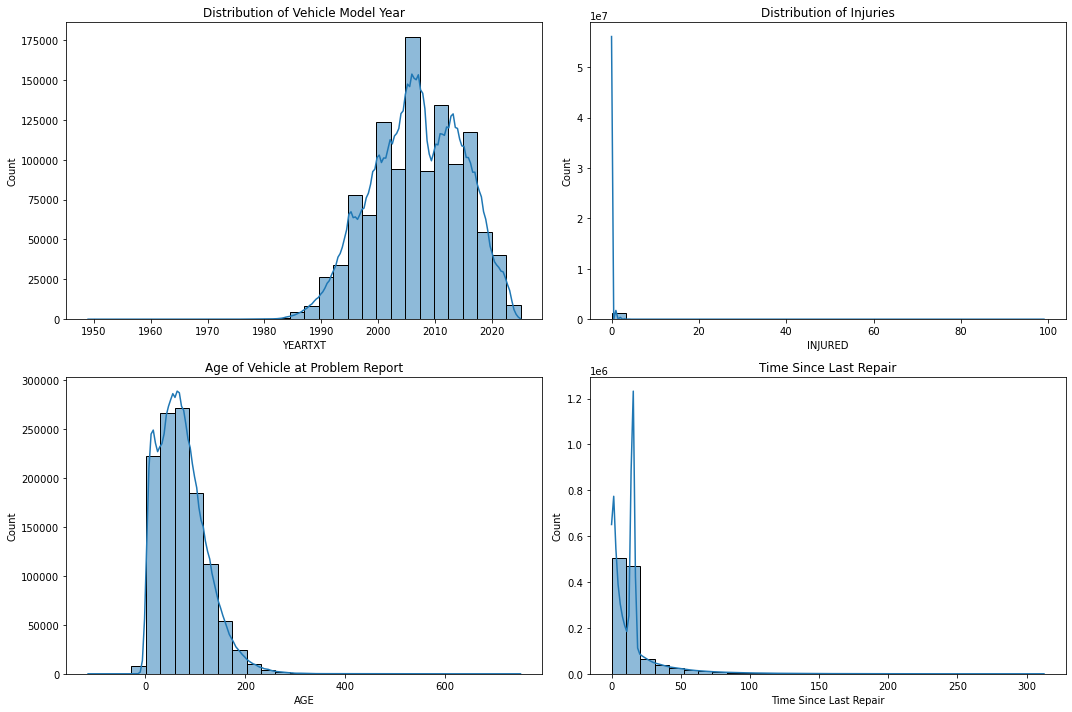

In [28]:
plt.figure(figsize=(15, 10))

# Histograms or KDE plots
plt.subplot(2, 2, 1)
sns.histplot(main_df['YEARTXT'], bins=30, kde=True)
plt.title('Distribution of Vehicle Model Year')

plt.subplot(2, 2, 2)
sns.histplot(main_df['INJURED'], bins=30, kde=True)
plt.title('Distribution of Injuries')

plt.subplot(2, 2, 3)
sns.histplot(main_df['AGE'], bins=30, kde=True)
plt.title('Age of Vehicle at Problem Report')

plt.subplot(2, 2, 4)
sns.histplot(main_df['Time Since Last Repair'], bins=30, kde=True)
plt.title('Time Since Last Repair')

plt.tight_layout()
plt.show()

Plot bar charts for binary and categorical data like CRASH, FIRE, ORIG_OWNER_YN

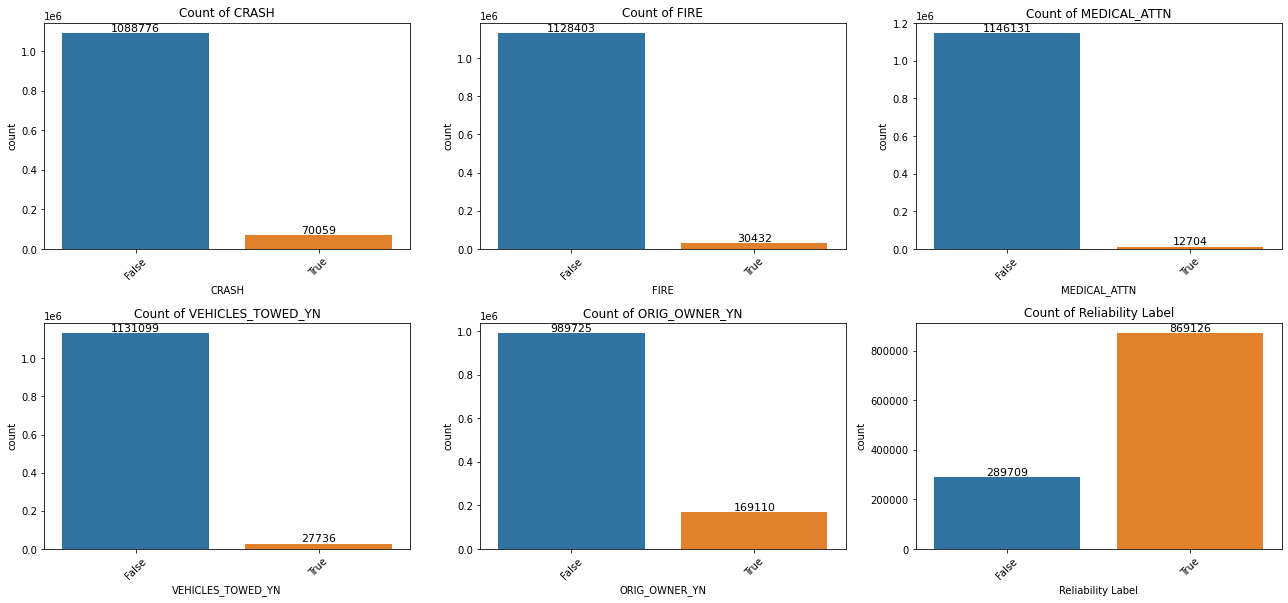

In [29]:
plt.figure(figsize=(18, 12))

# Plotting for each categorical variable
categories = ['CRASH', 'FIRE', 'MEDICAL_ATTN', 'VEHICLES_TOWED_YN', 'ORIG_OWNER_YN', 'Reliability Label']
for i, category in enumerate(categories):
    plt.subplot(3, 3, i+1)
    ax = sns.countplot(x=category, data=main_df)
    plt.title(f'Count of {category}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Exploring relationships or correlations between different variables, especially between numerical and categorical data.

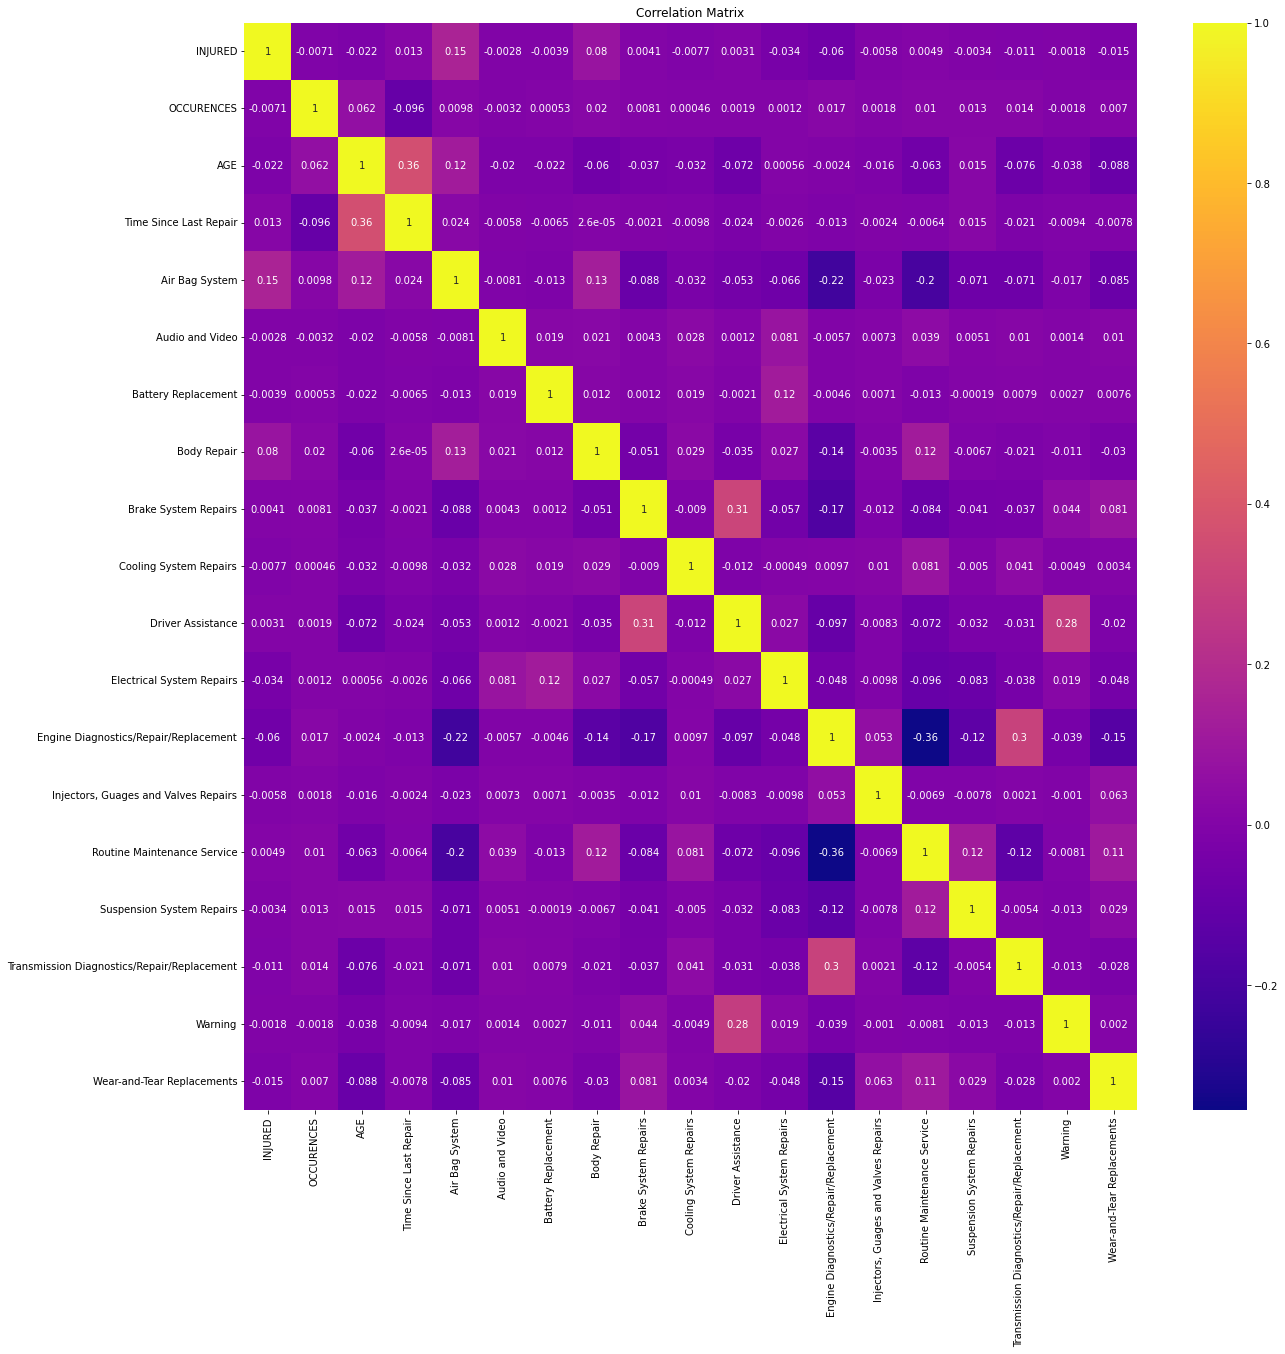

In [30]:
corr = main_df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='plasma')
plt.title('Correlation Matrix')
plt.show()

Visualizing the distribution of different repair and maintenance types.

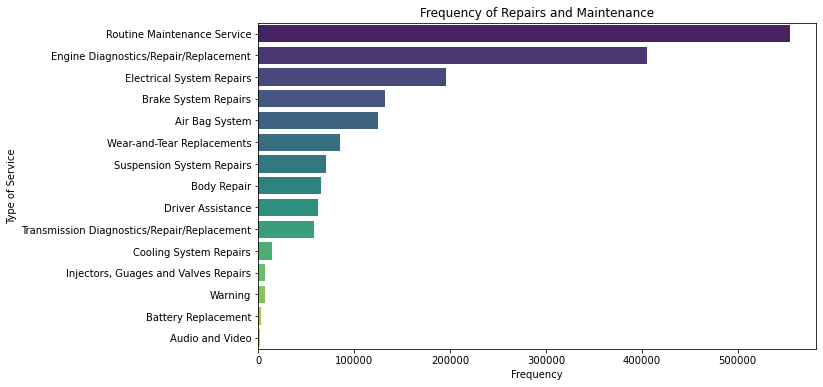

In [31]:
repair_columns = ['Air Bag System', 'Audio and Video', 'Battery Replacement', 'Body Repair', 'Brake System Repairs', 'Cooling System Repairs',
                  'Driver Assistance', 'Electrical System Repairs', 'Engine Diagnostics/Repair/Replacement', 'Injectors, Guages and Valves Repairs',
                  'Routine Maintenance Service', 'Suspension System Repairs', 'Transmission Diagnostics/Repair/Replacement',
                  'Warning', 'Wear-and-Tear Replacements']

repair_sums = main_df[repair_columns].sum().sort_values(ascending=False)
repair_sums = repair_sums.reset_index()
repair_sums.columns = ['Type of Service', 'Frequency']

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Type of Service', data=repair_sums, palette='viridis')
plt.title('Frequency of Repairs and Maintenance')
plt.xlabel('Frequency')
plt.ylabel('Type of Service')
plt.show()

## Model Building

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# main_df.to_csv("feature_engineered_data.csv", index=False)
main_df = pd.read_csv("feature_engineered_data.csv")

In [5]:
# Encoding boolean and categorical columns
label_encoders = {}
categorical_cols = main_df.select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols:
    le = LabelEncoder()
    main_df[col] = le.fit_transform(main_df[col])
    label_encoders[col] = le

In [6]:
# Splitting the data into features and the target variable
X = main_df.drop('Reliability Label', axis=1)
y = main_df['Reliability Label']

# Splitting the dataset into training and testing[30%] sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistics Regression

In [73]:
# Building the logistic regression model
model = LogisticRegression(max_iter=300, random_state=42)
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy of the model Logistic Regression Model:", accuracy)
print("Classification Report:\n", class_report)

Accuracy of the model: 0.9814123934635597

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     86594
           1       0.99      0.99      0.99    261057

    accuracy                           0.98    347651
   macro avg       0.98      0.97      0.98    347651
weighted avg       0.98      0.98      0.98    347651

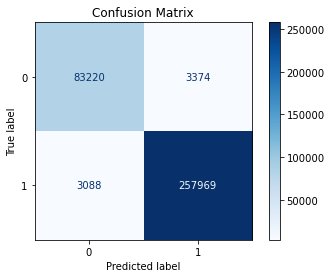

In [74]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Decision Tree

In [38]:
# Building the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

print("Accuracy of the decision tree model:", accuracy_tree)
print("Classification Report for Decision Tree:\n", class_report_tree)

Accuracy of the decision tree model: 0.995334401454332

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     86594
           1       1.00      1.00      1.00    261057

    accuracy                           1.00    347651
   macro avg       0.99      0.99      0.99    347651
weighted avg       1.00      1.00      1.00    347651

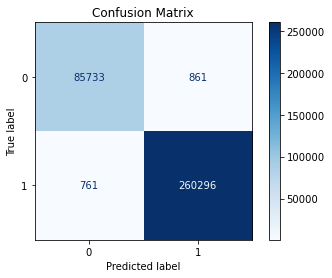

In [39]:
cm = confusion_matrix(y_test, y_pred_tree)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [70]:
# Building the random forest model with specified hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=120,  # Number of trees
    max_depth=15,      # Maximum depth of trees
    min_samples_split=20,  # Minimum number of samples required to split an internal node
    min_samples_leaf=5,    # Minimum number of samples required to be at a leaf node
    max_features='sqrt',   # Number of features to consider at every split
    bootstrap=True,        # Whether bootstrap samples are used
    random_state=42
)

In [71]:
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Accuracy of the Random Forest model:", accuracy_rf)
print("Classification Report for Random Forest:\n", class_report_rf)

Accuracy of the Random Forest model: 0.9887243241066472

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     86594
           1       0.99      1.00      0.99    261057

    accuracy                           0.99    347651
   macro avg       0.99      0.98      0.98    347651
weighted avg       0.99      0.99      0.99    347651

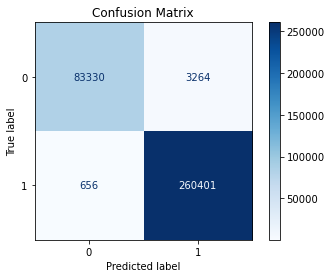

In [72]:
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Support Vector Machines

In [9]:
# from cuml.svm import SVC

In [10]:
# # Initializing the SVM classifier
# svm_model = SVC(
#     C=1.0,  # Regularization parameter
#     kernel='rbf',  # Type of kernel
#     degree=3,  # Degree of the polynomial kernel (ignored by other kernels)
#     gamma='scale',  # Kernel coefficient
#     random_state=42
# )

In [11]:
# # Fitting the model to the training data
# svm_model.fit(X_train, y_train)

# y_pred_svm = svm_model.predict(X_test)

# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# class_report_svm = classification_report(y_test, y_pred_svm)

# print("Accuracy of the Random Forest model:", accuracy_svm)
# print("Classification Report for Random Forest:\n", class_report_svm)

In [12]:
# cm = confusion_matrix(y_test, y_pred_svm)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.show()

### My Preference

I would go with the random forest Model. 
1. #### Balance Between Accuracy and Generalization
- Higher Accuracy: It is slightly lower than Decsion Tree but higher than logistic Regression with 98.14%. This indicates stronger performance
- Better Generalization: Random Forest is less likely to overfit compared to Decision Trees because they average mulitple trees to come to a decision. The presence of high precision and recall across both classes suggests that the model is not only accurate but robust towards unseen data.

2. #### Performance Across Differenct Metrics
- Handling Imbalanced Data: Random Forest is generally more effective than Logistic Regression in handling imbalanced datasets due to its ensemble approach, which helps in achieving better classification by looking at different aspects of the data through multiple trees.

3. #### Robustness to Noise and Outliers
- Handling Outliers: Random Forest can handle outliers better than Logistic Regression, which can be significantly affected by extreme values.
- Reduction of Overfitting: By building multiple trees and using the average outcome, Random Forest reduces the noise significantly more than a single Decision Tree, which can memorize the data.

4. #### Feature Importance Insights
- Feature Insights: Random Forest provides insights into which features are most important in predicting the outcome. 


#### Drawback
- Random Forest models are resource-intensive than decision trees or logistic regression. Not as easy to interpret as a single decision tree.

## Insignths

In [ ]:
# First we will predict the labels using our complete dataset
main_df['Predicted Reliability'] = rf_model.predict_proba(X)[:, 1] 

Gettting top 10 Reliable Brands

In [55]:
# Grouping by brand and calculating the mean reliability
reliability_scores = main_df.groupby(['MAKETEXT'])['Predicted Reliability'].mean()

# Sorting the scores to find the top reliable brands
top_reliable_vehicles = reliability_scores.sort_values(ascending=False).reset_index()

# Display the top 10 most reliable brand combinations
print(top_reliable_vehicles.head(10))

MAKETEXT  Predicted Reliability
0     GRAND DESIGN               0.990559
1         KEYSTONE               0.986905
2     FOREST RIVER               0.980400
3            JAYCO               0.976457
4              KTM               0.975776
5             THOR               0.961080
6  HARLEY-DAVIDSON               0.960706
7    INTERNATIONAL               0.958639
8         KAWASAKI               0.957746
9     FREIGHTLINER               0.955083

Gettting top 10 Reliable Brands-Model Combination

In [57]:
# Grouping by brand and model and calculating the mean reliability
reliability_scores = main_df.groupby(['MAKETEXT', 'MODELTEXT'])['Predicted Reliability'].mean()

# Sorting the scores to find the top reliable brands and models
top_reliable_vehicles = reliability_scores.sort_values(ascending=False).reset_index()

# Display the top 10 most reliable brand-model combinations
print(top_reliable_vehicles.head(10))

MAKETEXT        MODELTEXT  Predicted Reliability
0   YAMAHA          XT225TC               0.999284
1    VOLVO               WX               0.999231
2     THOR    SPORT UTILITY               0.999132
3   OTHERS     SUNSET CREEK               0.999115
4   OTHERS  CAMPING TRAILER               0.999093
5   OTHERS            21SSO               0.999084
6   SATURN    S-SERIES ONLY               0.999077
7   OTHERS    TRACK & TRAIL               0.999063
8   OTHERS          QH200GY               0.999052
9   OTHERS      JAZZ FRENZY               0.999044

Feature Importance

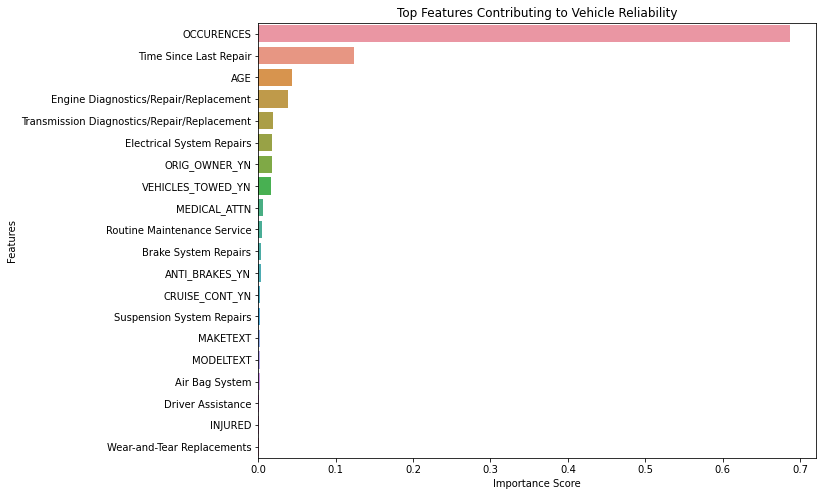

In [58]:
# Extract feature importances from the model
importances = rf_model.feature_importances_

# Matching the feature names with the importances
features = X.columns
importance_dict = dict(zip(features, importances))

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))  # Displaying top 20 features
plt.title('Top Features Contributing to Vehicle Reliability')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

The top 5 most important factors that contribute to the reliability of the vehicle are 
1. Occurences
2. Time since last Repair
3. AGE - at which the vehicle was given to serviving centre
4. Engine Diagnostics/Repair/Replacement
5. Transmission Diagnostics/Repair/Replacement